In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

from datasets import *
import matplotlib.pyplot as plt
import cv2
from keras.datasets import mnist
import tensorflow as tf
import numpy as np
from random import randint
import keras
import keras.backend as K
from keras.models import Model, Sequential
from keras.layers.merge import Concatenate
from keras.layers import Input, Reshape, Dense, Conv2D, Dropout, \
    MaxPooling2D, Flatten, UpSampling2D, Multiply, Activation, AveragePooling2D, \
    Add, Subtract, Lambda
from keras.layers.normalization import BatchNormalization
from keras.callbacks import ModelCheckpoint, TensorBoard
from scipy.ndimage import gaussian_filter as blur
from keras.optimizers import Adam
from keras.utils import multi_gpu_model as mgpu
from keras.utils import np_utils
import os, sys

Using TensorFlow backend.


In [5]:
from models.yprob import yprob

model = yprob(imsize=256)

print(model.model.count_params())
model.compile()
print('LR', K.eval(model.model.optimizer.lr))

 [!] Conv Spec:
 [!] 256 => 128: [64, 128]
 [!] 128 => 64: [256, 256, 256, 256]
 [!] 64 => 32: [256, 256, 256, 256]
 [!] 32 => 16: [256, 256, 256, 256]
 [!] 16 => 8: [512, 512, 512, 512]
 [!] 8 => 4: [512, 512, 512, 512]
45584898
LR 0.001


In [6]:
dset = Tissue()

 [*] tissue_sick: 2953 unique cases
 [*] tissue_healthy: 2951 unique cases
 [*] tissue_sick: 84270 / 17444
 [*] tissue_healthy: 230455 / 48109


In [7]:
datagen = dset.gen()
print(type(datagen))

for ii in range(50):
    imgs, lbls = next(datagen)
print(type(imgs))
print(type(lbls))
print(imgs.shape)
print(imgs[0].shape, imgs[0].dtype, np.max(imgs[0]))
print(lbls.shape)
print(lbls[0])


<class 'generator'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(64, 256, 256, 1)
(256, 256, 1) float32 0.8864437
(64, 2)
[1. 0.]


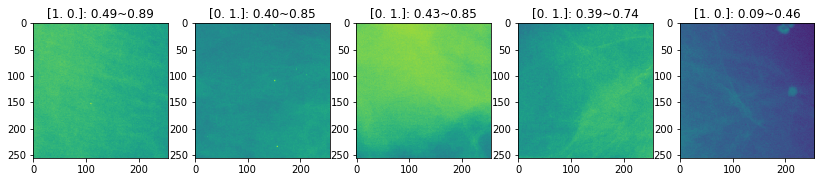

In [8]:
plt.figure(figsize=(14, 5))
for ii in range(5):
    plt.subplot(1, 5, ii+1)
    plt.gca().set_title('%s: %.2f~%.2f' % (lbls[ii], np.min(imgs[ii]), np.max(imgs[ii])))
    plt.imshow(imgs[ii, :, :, 0], vmin=0, vmax=1)
plt.show()
plt.close()

In [ ]:
bsize=32

LOGFOLDER = 'logs'
TAG = 'mnist'
try: shutil.rmtree('./%s/%s' % (LOGFOLDER, TAG)) 
except: pass
board_cb = TensorBoard('%s/%s' % (LOGFOLDER, TAG))

datagen = dset.gen(bsize=bsize)
evalgen = dset.gen(bsize=bsize, mode='test')
model.model.fit_generator(
    datagen,
    epochs=4,
    verbose=1,
    steps_per_epoch=dset.train_size // bsize,
#     steps_per_epoch=1,
    validation_data=evalgen,
    validation_steps=dset.test_size // bsize // 10 # just do 10th of val data
)


Epoch 1/4
 256/2633 [=>............................] - ETA: 22:10 - loss: 0.3260 - acc: 0.8958

In [ ]:
# TODO: visualize mistaking tiles